In [79]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Creación de gráficos
import matplotlib.pyplot as plt
from time import time
# Herramientas de SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Nuevo
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix

<function sklearn.metrics.classification.confusion_matrix>

In [56]:
# Leer el set de datos y consultar información básica
df = pd.read_csv('digitos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [57]:
# Consultar los primeros registros del set de datos
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

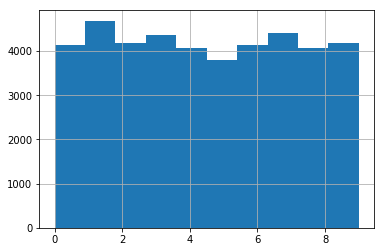

In [59]:
df['label'].hist()

In [60]:
# Obtener una sección del DataFrame usando los números de columna
pixeles = df.iloc[:,1:785]
digitos = df.iloc[:,0:1]

In [65]:
# Separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [74]:
# Consultar información de la muestra de entrenamiento
X_train.shape

(21000, 784)

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
def mostrar_num(in_data):
    """Genera un gráfico que muestra un registro
    del set de datos.
    Para ello, convierte el array de 1 dimensión en
    una matriz de 28x28.
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))

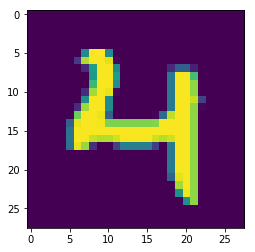

In [68]:
mostrar_num(X_test.iloc[100])

In [69]:
# Creación del modelo
modelo = SVC(kernel='linear')

In [75]:
# Entrenamiento
hora_inicio = time()
modelo.fit(X_train.as_matrix(), y_train.as_matrix().ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 57.229241609573364


In [76]:
# Crear predicción de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.as_matrix())
print('Predicción terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Predicción terminada en 80.41295003890991
(21000,)


In [77]:
precision = accuracy_score(y_test, y_pred)
print('Precisión: {}'.format(precision))

Precisión: 0.9114761904761904


El dígito es: [5]


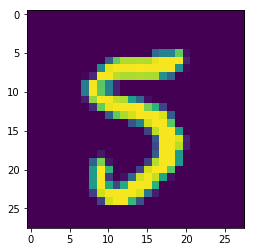

In [78]:
prueba = X_test.iloc[1900]
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print('El dígito es: {}'.format(prediccion))

In [81]:
conf = confusion_matrix(y_test, y_pred)

In [82]:
conf

array([[2030,    0,    6,    4,    2,   13,   18,    0,    5,    0],
       [   1, 2326,    8,    5,    3,    2,    1,    4,   18,    2],
       [  21,   19, 1896,   41,   23,    8,   14,   19,   26,    3],
       [  11,   11,   70, 1902,    3,   88,    4,   12,   48,   15],
       [   7,   10,   19,    3, 1876,    3,   18,    7,    7,   58],
       [  27,   10,   19,  110,   16, 1656,   24,    1,   39,   14],
       [  22,    1,   36,    5,   14,   21, 1950,    0,    4,    0],
       [   5,   12,   26,   21,   24,    9,    2, 2006,    5,  106],
       [  15,   40,   58,   78,    7,   67,    9,   14, 1751,   15],
       [  17,   10,   14,   32,  130,   12,    0,   92,   16, 1748]])

In [84]:
def plot_cm(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

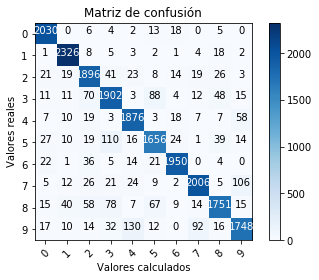

In [85]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
def plot_cm(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for index_fila, fila in enumerate(cm):
        for index_col, col in enumerate(fila):
            plt.text(
                index_col,
                index_fila,
                cm[index_fila, index_col],
                horizontalalignment="center",
                color="white" if cm[index_fila, index_col] > thresh else "black"
            )
    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Valor predicción')

In [86]:
conf

array([[2030,    0,    6,    4,    2,   13,   18,    0,    5,    0],
       [   1, 2326,    8,    5,    3,    2,    1,    4,   18,    2],
       [  21,   19, 1896,   41,   23,    8,   14,   19,   26,    3],
       [  11,   11,   70, 1902,    3,   88,    4,   12,   48,   15],
       [   7,   10,   19,    3, 1876,    3,   18,    7,    7,   58],
       [  27,   10,   19,  110,   16, 1656,   24,    1,   39,   14],
       [  22,    1,   36,    5,   14,   21, 1950,    0,    4,    0],
       [   5,   12,   26,   21,   24,    9,    2, 2006,    5,  106],
       [  15,   40,   58,   78,    7,   67,    9,   14, 1751,   15],
       [  17,   10,   14,   32,  130,   12,    0,   92,   16, 1748]])

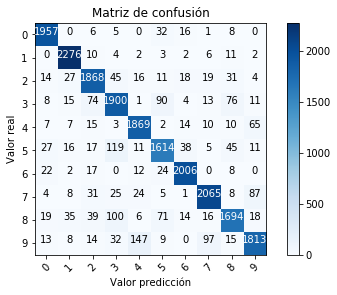

In [54]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])